In [55]:
%matplotlib inline
import pandas as pd
from pandas.plotting import scatter_matrix

In [56]:
#Read in the dataset
dataset = pd.read_csv('./data/nyt1.csv')

In [57]:
#Lets take a look at what data we are dealing with
dataset.describe()

,Age,Gender,Impressions,Clicks,Signed_In
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930
std,23.607034,0.481997,2.239349,0.309973,0.457851
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000


In [58]:
#Here is our age list for reference, we'd like to create a new feature group based
#On the person's age
age_list = ["<18", "18-24", "25-34", "35-44", "45-54", "55-65", "65+"]
dataset = dataset.assign(age_group=dataset["Age"])

In [59]:
#Here is a helper function we can use to determine a person's age group
def assignAgeGroup(row):
    age = int(row.Age)
    if age < 18:
        return 0
    elif 18 <= age <= 24:
        return 1
    elif 25 <= age <= 34:
        return 2
    elif 35 <= age <= 44:
        return 3
    elif 45 <= age <= 54:
        return 4
    elif 55 <= age <= 64:
        return 5
    else:
        return 6

def assignClickThroughRate(row):
    clicks = int(row.Clicks)
    impressions = int(row.Impressions)
    try:
        return clicks / impressions
    except:
        return 0
#Lets take a look at the first bit of data so we can see the age group
dataset.head()

,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,36,0,3,0,1,36
1,73,1,3,0,1,73
2,30,0,3,0,1,30
3,49,1,3,0,1,49
4,47,1,11,0,1,47


In [60]:
#Right now the age group is just the age, so lets mutate that to place 
#Each person into the right group
dataset["age_group"] = dataset.apply(lambda row: assignAgeGroup(row), axis=1)
dataset["click_through_rate"] = dataset.apply(lambda row: assignClickThroughRate(row), axis=1)

In [61]:
#Alright, now our data should have the age group appropiately applied
dataset.head()

,Age,Gender,Impressions,Clicks,Signed_In,age_group,click_through_rate
0,36,0,3,0,1,3,0.0
1,73,1,3,0,1,6,0.0
2,30,0,3,0,1,2,0.0
3,49,1,3,0,1,4,0.0
4,47,1,11,0,1,4,0.0


In [62]:
dataset.describe()

,Age,Gender,Impressions,Clicks,Signed_In,age_group,click_through_rate
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930,2.231437,0.018347
std,23.607034,0.481997,2.239349,0.309973,0.457851,1.987317,0.068820
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000,2.000000,0.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000,4.000000,0.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000,6.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d930e9400>,
      dtype=object)

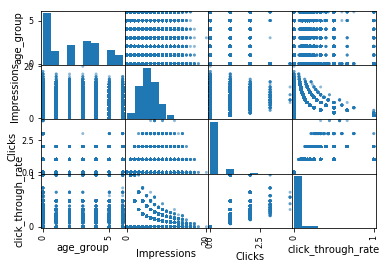

In [63]:
scatter_matrix(dataset[['age_group', 'Impressions', 'Clicks', 'click_through_rate']])

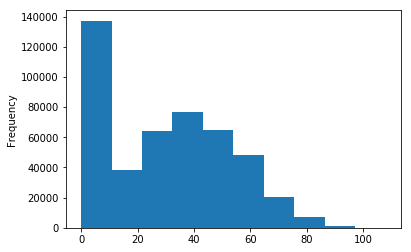

In [64]:
dataset['Age'].plot(kind='hist')

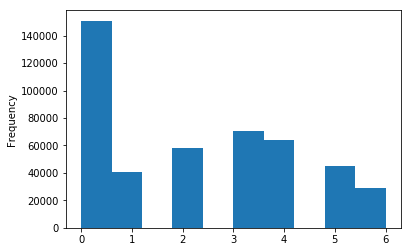

In [65]:
dataset['age_group'].plot(kind='hist')

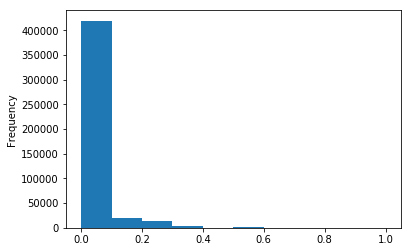

In [66]:
dataset['click_through_rate'].plot(kind='hist')

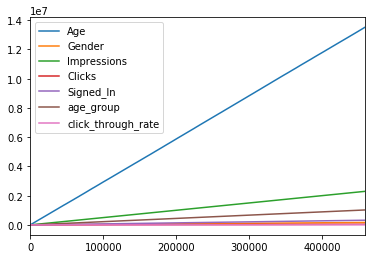

In [67]:
dataset.cumsum().plot()

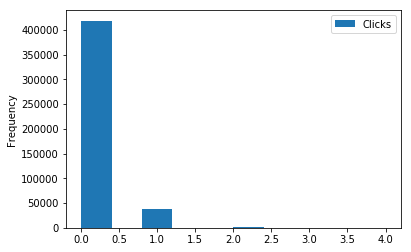

In [68]:
dataset.plot(x='Age', y='Clicks', kind='hist')

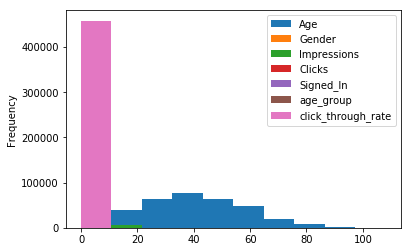

In [69]:
dataset.plot(kind='hist')

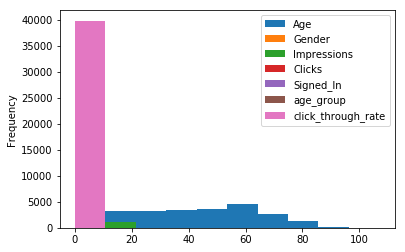

In [70]:
dataset[dataset.Clicks > 0].plot(kind='hist')

In [71]:
dataset.head()
#dataset = dataset['age_group'].astype('category')
#dataset = dataset['age_group'].cat.categories(age_list)
#pd.pivot_table(dataset, values='Clicks', index='age_group', columns='Impressions')

,Age,Gender,Impressions,Clicks,Signed_In,age_group,click_through_rate
0,36,0,3,0,1,3,0.0
1,73,1,3,0,1,6,0.0
2,30,0,3,0,1,2,0.0
3,49,1,3,0,1,4,0.0
4,47,1,11,0,1,4,0.0


In [72]:
dataset['Impressions'].value_counts()

5     80477
4     80303
6     66808
3     64121
7     48066
2     38433
8     30081
9     16965
1     15483
10     8357
11     3771
0      3066
12     1549
13      647
14      211
15       64
16       25
17       11
18        2
20        1
Name: Impressions, dtype: int64